In [2]:
import numpy as np
import os
import pandas as pd
import sys
import cv2
from matplotlib import pyplot
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

In [3]:
# Firstly declare an address. This address is prepared for the next step.
PATH = "/home/mlvm2/ce888labs/ce888_ass/Japanese_(katakana)"

# Create a list of items in the address we declared above.
Charac_list = list(os.path.join(PATH, Charac) for Charac in os.listdir(PATH))

def Load_data(character_number, letter_number):
    
    data = ["", 0] # first, create a list including messages we need to return.
    
    #rand_charac = np.random.randint(52) # random choose.
    rand_charac = character_number
    rand_letter = letter_number
    #rand_letter = np.random.randint(20) # random choose.
    rand_charac_path = Charac_list[rand_charac]
    Letters_list = list(os.path.join(rand_charac_path, letter) for letter in os.listdir(rand_charac_path))
    data[0] = Letters_list[rand_letter]
#    if rand_charac != 0: # if they are in the same folder, then they are the same,else not.
#        data[1] = 0
#    else:
#        data[1] = 1
    data[1] = rand_charac
    return data

Data_tra = [["image", "label"]]
Data_tes = [["image", "label"]]

for i in range(0,47):
    for j in range (0,15):# we randomly get 1000 samples as our test dataset. 
        data1 = Load_data(i,j)
        Data_tra.append(data1)

for i in range(0,47):
    for j in range(15, 20):# we randomly get 1000 samples as our test dataset. 
        data1 = Load_data(i,j)
        Data_tes.append(data1)
    
# print(Data)

df1 = pd.DataFrame(Data_tra) 
df2 = pd.DataFrame(Data_tes) 

df1

,0,1
0,image,label
1,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0
2,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0
3,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0
4,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0
5,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0
6,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0
7,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0
8,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0
9,/home/mlvm2/ce888labs/ce888_ass/Japanese_(kata...,0


In [4]:
# --------------------------------------------------------------------------
# Save our data into a .csv file.
# --------------------------------------------------------------------------
df1.to_csv("Data_tra_katakana",index='False')
df2.to_csv("Data_tes_katakana",index='False')

In [5]:
# ------------------------------------------------------------
# Data read and pre-processing.
# ------------------------------------------------------------
df_tra = pd.read_csv("Data_tra_katakana")
df_tra.drop(df_tra.index[0], inplace = True)
del df_tra["Unnamed: 0"]
df_tes = pd.read_csv("Data_tes_katakana")
df_tes.drop(df_tes.index[0], inplace = True)
del df_tes["Unnamed: 0"]
df_tes.shape

(235, 2)

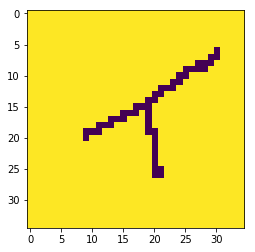

In [6]:
# --------------------------------------------------------------
# Simple image processing methods.
# --------------------------------------------------------------
image = cv2.imread(df_tra.iloc[27,0], cv2.IMREAD_GRAYSCALE)
image_after =  np.zeros((35,35))

def process(image, row, col):
    collect = 0
    for i in range(3*row, 3*(row+1)):
        for j in range(3*col, 3*(col+1)):
            if image[i,j] == 0:
                collect = collect + 1
    if collect>=7:
        return 0
    else:
        return 255

for i in range(0, 35):
    for j in range(0, 35):
        image_after[i,j] = process(image, i, j)  

pyplot.imshow(image_after)

In [7]:
I = np.array(image_after,dtype=bool)
I = np.logical_not(I)
(row,col) = I.nonzero()
D = np.array([row,col])
D = np.transpose(D)
n = D.shape[0]    
mean = np.mean(D,axis=0)
coordinates = np.zeros((n,2))
for i in range(n):
	coordinates[i,:] = D[i,:] - mean
#D = D.astype(float)
D

array([[ 6, 30],
       [ 7, 29],
       [ 7, 30],
       [ 8, 27],
       [ 8, 28],
       [ 8, 29],
       [ 9, 25],
       [ 9, 26],
       [ 9, 27],
       [ 9, 28],
       [10, 24],
       [10, 25],
       [11, 23],
       [11, 24],
       [12, 21],
       [12, 22],
       [12, 23],
       [13, 20],
       [13, 21],
       [14, 19],
       [14, 20],
       [15, 17],
       [15, 18],
       [15, 19],
       [16, 15],
       [16, 16],
       [16, 17],
       [16, 19],
       [17, 13],
       [17, 14],
       [17, 15],
       [17, 19],
       [18, 11],
       [18, 12],
       [18, 13],
       [18, 19],
       [19,  9],
       [19, 10],
       [19, 11],
       [19, 19],
       [19, 20],
       [20,  9],
       [20, 20],
       [21, 20],
       [22, 20],
       [23, 20],
       [24, 20],
       [25, 20],
       [25, 21],
       [26, 20],
       [26, 21]])

In [252]:
cluster = SpectralClustering(n_clusters=2)

In [253]:
result = cluster.fit_predict(coordinates)

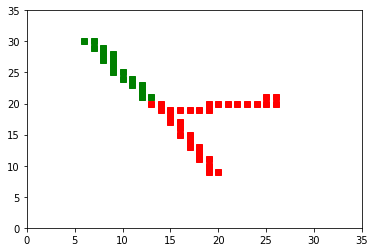

In [254]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
for i in range(0, len(result)):
    if result[i] == 0:
        pyplot.plot(D[i,0],D[i,1],color='r',marker=markers[1],ls='None')
    elif result[i] == 1:
        pyplot.plot(D[i,0],D[i,1],color='g',marker=markers[1],ls='None')   
    elif result[i] == 2:
        pyplot.plot(D[i,0],D[i,1],color='b',marker=markers[1],ls='None') 
    pyplot.xlim([0,35])
    pyplot.ylim([0,35])